# HW2
### Muf Tayebaly mt3195

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

## Task 1

In [2]:
data = fetch_openml("credit-g",as_frame=True)
df = data.data
df["target"]=data.target
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
continuous_f = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']
categorical_f = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

## 1.1

In [5]:
print("\033[1mContinuous:\033[0m")
for x in range(0,len(continuous_f)):
    print(continuous_f[x])
print("\n\033[1mCategorical:\033[0m")
for x in range(0,len(categorical_f)):
    print(categorical_f[x])

Continuous:
duration
credit_amount
installment_commitment
residence_since
age
existing_credits
num_dependents

Categorical:
checking_status
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker


## 1.2

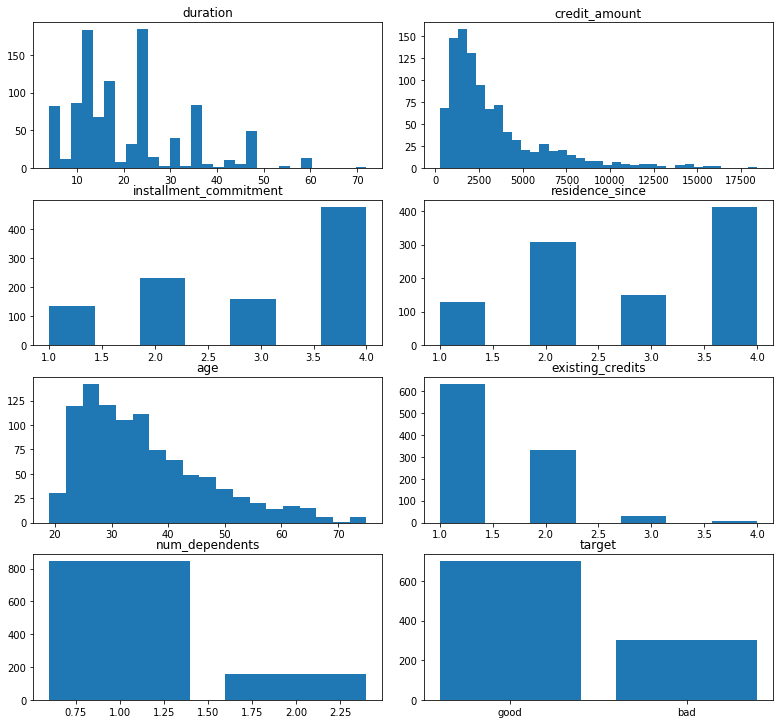

In [6]:
fig, ax = plt.subplots(4,2, figsize=(11, 10))
fig.tight_layout()

ax[0,0].set_title(continuous_f[0])
ax[0,0].hist(df[continuous_f[0]], bins='auto')

ax[0,1].set_title(continuous_f[1])
ax[0,1].hist(df[continuous_f[1]], bins='auto')

ax[1,0].set_title(continuous_f[2])
ax[1,0].hist(df[continuous_f[2]], bins=7)

ax[1,1].set_title(continuous_f[3])
ax[1,1].hist(df[continuous_f[3]], bins=7)

ax[2,0].set_title(continuous_f[4])
ax[2,0].hist(df[continuous_f[4]], bins='auto')

ax[2,1].set_title(continuous_f[5])
ax[2,1].hist(df[continuous_f[5]], bins=7)

ax[3,0].set_title(continuous_f[6])
ax[3,0].bar(df[continuous_f[6]].unique(), df[continuous_f[6]].value_counts())

ax[3,1].set_title("target")
ax[3,1].bar(df["target"].unique(), df["target"].value_counts())

plt.show()

## 1.3

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train, test = train_test_split(df, test_size=0.2)

In [67]:
y_train = train["target"]
X_train = train.loc[:, train.columns != "target"]

In [68]:
X_train_ohe = pd.get_dummies(X_train, columns=categorical_f)
#X_train_ohe.head()

In [69]:
y_train = y_train.map(dict(good=1, bad=0))
#y_train

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [71]:
X_train_np = X_train_ohe.to_numpy()
y_train_list = y_train.values.tolist()

In [72]:
evaluate = cross_val_predict(LogisticRegression(max_iter=5000), X_train_np, y_train_list, cv=5)
print("Evaluated on cross validation:",metrics.accuracy_score(y_train_list, evaluate))

Evaluated on cross validation: 0.7575


## 1.4

In [83]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [84]:
#categorical = df.dtypes == object
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical_f)
)

In [85]:
model1_pipe = make_pipeline(preprocess, LogisticRegression(max_iter=5000))
scores = cross_val_score(model1_pipe, X_train, y_train_list)
print("Logistic Regression evaluated on cross validation:", np.mean(scores))

Logistic Regression evaluated on cross validation: 0.7474999999999998


In [86]:
from sklearn.svm import LinearSVC

model2_pipe = make_pipeline(preprocess, LinearSVC(max_iter=5000))
scores2 = cross_val_score(model2_pipe, X_train, y_train_list)
print("Linear SVM evaluated on cross validation:", np.mean(scores2))

Linear SVM evaluated on cross validation: 0.74375


In [87]:
from sklearn.neighbors import KNeighborsClassifier

model3_pipe = make_pipeline(preprocess, KNeighborsClassifier(n_neighbors=3))
scores3 = cross_val_score(model3_pipe, X_train, y_train_list)
print("K Nearest Neighbors evaluated on cross validation:", np.mean(scores3))

K Nearest Neighbors evaluated on cross validation: 0.7137500000000001


In [88]:
preprocess2 = make_column_transformer(
    (StandardScaler(), continuous_f),
    (OneHotEncoder(), categorical_f)
)

model4_pipe = make_pipeline(preprocess2, LogisticRegression(max_iter=5000))
scores4 = cross_val_score(model4_pipe, X_train, y_train_list)
print("Logistic Regression (scaling) evaluated on cross validation:", np.mean(scores4))

model5_pipe = make_pipeline(preprocess2, LinearSVC(max_iter=5000))
scores5 = cross_val_score(model5_pipe, X_train, y_train_list)
print("Linear SVM (scaling) evaluated on cross validation:", np.mean(scores5))

model6_pipe = make_pipeline(preprocess2, KNeighborsClassifier(n_neighbors=3))
scores6 = cross_val_score(model6_pipe, X_train, y_train_list)
print("K Nearest Neighbors (scaling) evaluated on cross validation:", np.mean(scores6))

Logistic Regression (scaling) evaluated on cross validation: 0.7675000000000001
Linear SVM (scaling) evaluated on cross validation: 0.76375
K Nearest Neighbors (scaling) evaluated on cross validation: 0.7162499999999999


It looks like Logistic Regression had the best evaluated cross val score in both without and with scaling.  The other two were not that much off, but Linear SVM was slightly better than Nearest Neighbors.
  
StandardScaling the continuous features helped improve the scores across all 3 models.

## 1.5